# Определение перспективного тарифа для телеком-компании

**Цель проекта**: изучить данные из выборки пользователей компании "Мегалайн" и выяснить, какой тариф выгоднее продвигать компании.

## Общая информация по данным

In [1]:
# импорт библиотек
import pandas as pd 
from scipy import stats as st 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from scipy import stats as st

### Информация по каждой из таблиц 

#### Таблица с информацией о звонках

In [2]:
data_calls = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\calls.csv') # таблица с информацией о тарифах
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
data_calls.info() # сводная информация по таблице о звонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
data_calls.describe() # статистическая информация 

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
for column in data_calls: # уникальные значения каждого столбца файла
         print(column) # вывести название колонки
         print()
         print(data_calls[column].unique()) # вывести уникальные значения каждого столбца

id

['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
call_date

['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-09' '2018-08-01' '2018-06-18' '2018-10

####  Таблица с информацией о потраченном интернет-трафике

In [8]:
data_internet = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\internet.csv') # таблица с информацией о потраченном интренет-трафике
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
data_internet.info() # общая инфомация о потраченном интернет-трафике

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
data_internet.describe() # статистическая информация

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [11]:
for column in data_internet: # уникальные значения каждого столбца файла
         print(column) # вывести название колонки
         print()
         print(data_internet[column].unique()) # вывести уникальные значения каждого столбца

Unnamed: 0

[     0      1      2 ... 149393 149394 149395]
id

['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
mb_used

[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]
session_date

['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018-11-04' '2018-06-16' '2018-12-07'
 '2018-08-25' '2018-06-15' '2018-06-26' '2018-10-06' '2018-12-01'
 

#### Таблица с информацией об отправленных сообщениях

In [12]:
data_messages = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\messages.csv') # таблица с информацией об отправленных сообщениях
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
data_messages.info() # общая информация о таблице об отправленных сообщениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
data_messages.describe() # статистическая инфомация

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [15]:
for column in data_messages: # уникальные значения каждого столбца файла
         print(column) # вывести название колонки
         print()
         print(data_messages[column].unique()) # вывести уникальные значения каждого столбца

id

['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
message_date

['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '2018-09-13' '2018-08-13' '2018-12-31' '2018-06-10' '2018

#### Таблица с информацией о тарифах

In [16]:
data_tariff = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\tariffs.csv') # таблица с информацией о тарифах
data_tariff

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
data_tariff.info() # сводная информация по таблице о тарифах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Таблица с информацией о пользователях

In [18]:
data_users = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\users.csv') # таблица с информацией о звонках
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
data_users.info() # сводная информация по таблице о звонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
for column in data_users:
    print(column)
    print()
    print(data_users[column].unique())
    print()

user_id

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 11

**Вывод**

В data_calls в столбце 'duration' имеются нули, которые обозначают пропущенные звонки. Так как эти нули не повлияют на продолжительность разговоров за месяц, которая важна для дальнейшего анализа, то они будут оставлены без изменений.

В data_users в столбце 'churn_date' имеются пропущенные значения. Скорее всего, эти значения обозначают то, что человек все еще пользуется тарифом. Данный столбец не понадобится в дальнейшем анализа, поэтому будет оставлен без изменений.

Других подозрительных значений в датасетах не было обнаружено.

В столбцах, где расположены даты, тип данных будет изменен со строкового на формат даты и времени. Это будет сделано для того, чтобы можно было получиться отдельно информацию о месяце совершения звонка.

## Создание общей таблицы

### Сводная таблица для таблицы с информацией о звонках, data_calls

In [21]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d') # преобразование столбца 'call_date' в формат дат
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [22]:
data_calls['month'] = data_calls['call_date'].dt.month # создание столбца с месяцами, в которые осуществлялись звонки
data_calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,0.00,1000,11
6,1000_6,2018-10-18,0.00,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,0.00,1000,8


In [23]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype(int) # округление минут разговора в большую сторону и преобразование типа данных в int
data_calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


In [24]:
data_calls_pivot = data_calls[['user_id', 'month', 'duration', 'call_date']] # срез, на основании которого будет сделана сводная таблица с расчетом суммы минут и количества звонков за месяц
data_calls_pivot = data_calls_pivot.groupby(['user_id', 'month']).agg(['sum', 'count']).reset_index() # формирование сводной таблицы, где для каждого пользователя посчитано общее количество минут и звонков по каждому месяцу
data_calls_pivot.columns=['user_id', 'month', 'mins_per_month', 'calls_per_month'] # переименование столбцов
data_calls_pivot.head(10)

,user_id,month,mins_per_month,calls_per_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
5,1000,10,350,57
6,1000,11,338,43
7,1000,12,333,46
8,1001,11,430,59
9,1001,12,414,63


**Вывод**

На основании data_calls был сделан срез data_calls_pivot по столбцам с id абонента, месяца, продолжительности звонков и даты звонка. В data_calls_pivot была подсчитана общая длительность разговоров за месяц и количество звонков.

### Сводная таблица для таблицы с информацией об интернет-сессиях, data_internet

In [25]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')  # преобразование столбца 'session_date' в формат дат
data_internet.info() # проверка замена типа данных в столбце 'session_date'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [26]:
data_internet['month'] = data_internet['session_date'].dt.month # создание столбца с месяцами, в которые осуществлялись интернет-сессии

In [27]:
data_internet_pivot = data_internet[['user_id', 'month', 'mb_used']] # формирование среза, на основании которого будет сделан расчет использованного интернет-трафика за месяц
data_internet_pivot = data_internet_pivot.groupby(['user_id', 'month']).agg('sum').reset_index() # формирование сводной таблицы, где для каждого пользователя посчитано общее количество израсходованных мегабайтов по каждому месяцу
data_internet_pivot.head(10)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


In [28]:
data_internet_pivot['mb_used'] = np.ceil(data_internet_pivot['mb_used']/1024) # перевод мегабайтов в гигабайты и округление гигабайтов в большую сторону
data_internet_pivot.columns = ['user_id', 'month', 'gb_per_month'] # переименование столбцов 
data_internet_pivot.head(10)

,user_id,month,gb_per_month
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
5,1000,10,15.0
6,1000,11,15.0
7,1000,12,10.0
8,1001,11,18.0
9,1001,12,14.0


**Вывод**

На основании таблицы data_internet была сделана таблица data_internet_pivot, где для каждого пользователя было рассчитано количество потраченных гигабайтов за каждый месяц пользования тарифом.

###  Сводная таблица для таблицы с информацией об отправленных сообщениях, data_messages

In [29]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d') # преобразование столбца 'message_date' в формат дат
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [30]:
data_messages['month'] = data_messages['message_date'].dt.month # создание столбца с месяцами, в которые отправлялись смс

In [31]:
data_messages_pivot = data_messages[['user_id', 'month','message_date']] # срез, на основании которого будет рассчитано количество смс, отправляемых каждым пользователем за каждый месяц
data_messages_pivot = data_messages_pivot.groupby(['user_id', 'month']).agg('count').reset_index() # сводная таблица с расчетом количества смс для каждого пользователя по каждому месяцу
data_messages_pivot.columns = ['user_id', 'month', 'messages_per_month'] # переименование столбцов
data_messages_pivot.head(10)


,user_id,month,messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


**Вывод**

На основании таблицы data_messages была сделана таблица data_messages_pivot, в которой для каждого пользователя рассчитано количество сообщений, отправленных за каждый месяц.

### Срез с информацией об абонентах и их тарифах

In [32]:
data_users_cut = data_users[['user_id', 'tariff']] # срез таблицы data_users по столбцам 'user_id' и 'tariff'
data_users_cut.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


### Формирование общей таблицы

In [33]:
data = data_calls_pivot.merge(data_internet_pivot, on = ['user_id', 'month'], how='outer') # объединение таблицы с информацией о звонках и с таблицей с информацией об интернет-сессиях
data = data.merge(data_messages_pivot, on = ['user_id', 'month'], how='outer') # объединение предыдущей таблицы с таблицей с информацией о сообщениях
data =  data.merge(data_users_cut, on = 'user_id', how='outer')# добавление в data столбца с информацией о тарифах
data.head(10)

,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff
0,1000,5.0,159.0,22.0,3.0,22.0,ultra
1,1000,6.0,172.0,43.0,23.0,60.0,ultra
2,1000,7.0,340.0,47.0,14.0,75.0,ultra
3,1000,8.0,408.0,52.0,14.0,81.0,ultra
4,1000,9.0,466.0,58.0,15.0,57.0,ultra
5,1000,10.0,350.0,57.0,15.0,73.0,ultra
6,1000,11.0,338.0,43.0,15.0,58.0,ultra
7,1000,12.0,333.0,46.0,10.0,70.0,ultra
8,1001,11.0,430.0,59.0,18.0,NaN,smart
9,1001,12.0,414.0,63.0,14.0,NaN,smart


In [34]:
# data_frames = ['data_calls_pivot', 'data_internet_pivot', 'data_messages_pivot'] # данные, которые надо соединить в одну таблицу
# data_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
#                                             how='outer'), data_frames).fillna(value=0) # объединяю таблицы из списка data_frames по двум столбцам
# data_merged = data_merged.merge(data_users_cut, on = 'user_id', how='outer') # эту таблицу я объединила отдельно, так как тут объединение происходит по одному столбцу
# data_merged

In [35]:
data.info() # информация по общей таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3216 non-null   int64  
 1   month               3214 non-null   float64
 2   mins_per_month      3174 non-null   float64
 3   calls_per_month     3174 non-null   float64
 4   gb_per_month        3203 non-null   float64
 5   messages_per_month  2717 non-null   float64
 6   tariff              3216 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 201.0+ KB


In [36]:
data = data.fillna(value=0) # заполение пропусков нулями, так как если в ячейках о количестве смс, минут звонков и протраченного трафика
# есть пропуски. Это значит, что абонент не пользовался в этом месяце данной услугой.
# в 'user_id' и 'month' пропусков быть не может, так как в оригинальных таблицах эти столбцы заполнены полностью 

In [37]:
list_float_to_int = ['mins_per_month', 'calls_per_month', 'gb_per_month', 'messages_per_month'] # список столбцов, значения которых надо перевести из формата float в int
for i in list_float_to_int: # для каждого значения списка list_float_to_int
    data[i] = data[i].astype(int) # перевести значение соответсвующей колонки в int
data.head(10)

,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff
0,1000,5.0,159,22,3,22,ultra
1,1000,6.0,172,43,23,60,ultra
2,1000,7.0,340,47,14,75,ultra
3,1000,8.0,408,52,14,81,ultra
4,1000,9.0,466,58,15,57,ultra
5,1000,10.0,350,57,15,73,ultra
6,1000,11.0,338,43,15,58,ultra
7,1000,12.0,333,46,10,70,ultra
8,1001,11.0,430,59,18,0,smart
9,1001,12.0,414,63,14,0,smart


### Расчет помесячной выручки с каждого пользователя

In [38]:
data_tariff['gb_per_month_included'] = (data_tariff['mb_per_month_included']/1024).astype(int) # добаление в таблицу с информацией о тарифах столбца, в котором лимит по мегабайтам переведен в гигабайты
data_tariff

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


In [39]:
data_tariff = data_tariff.set_index('tariff_name') # изменение индексов на значения столбца 'tariff_name'
data_tariff

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
tariff_name,,,,,,,,
smart,50,15360,500,550,200,3,3,15
ultra,1000,30720,3000,1950,150,1,1,30


In [40]:
def revenue_per_month(row):
    """ Функция для расчета помесячной выручки с каждого абонента
    Принимает количество минут разговора за месяц, количество отправленных смс и количество использованных гигабайтов
    Возвращает сумму, заплаченную абонентом за месяц, в зависимости от тарифа"""
    calls_overpay = max(0, (row['mins_per_month'] - data_tariff.loc[row['tariff'],'minutes_included']) * data_tariff.loc[row['tariff'],'rub_per_minute']) # подсчет переплаты за минуты звонков
    messages_overpay = max(0, (row['messages_per_month'] - data_tariff.loc[row['tariff'],'messages_included']) * data_tariff.loc[row['tariff'],'rub_per_message']) # подсчет переплаты за сообщения
    internet_overpay = max(0, (row['gb_per_month'] - data_tariff.loc[row['tariff'],'gb_per_month_included']) * data_tariff.loc[row['tariff'],'rub_per_gb']) # подсчет переплаты за интернет-трафик
    return calls_overpay + messages_overpay + internet_overpay + data_tariff.loc[row['tariff'], 'rub_monthly_fee'] # общая сумма, которую должен заплатить абонент с учетом базового тарифа и переплат

    
data['revenue_per_month'] = data.apply(revenue_per_month, axis=1) # применить функцию revenue_per_month к строкам датафрейма и создать столбец с выручкой за месяц
data.head(20)


,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff,revenue_per_month
0,1000,5.0,159,22,3,22,ultra,1950
1,1000,6.0,172,43,23,60,ultra,1950
2,1000,7.0,340,47,14,75,ultra,1950
3,1000,8.0,408,52,14,81,ultra,1950
4,1000,9.0,466,58,15,57,ultra,1950
5,1000,10.0,350,57,15,73,ultra,1950
6,1000,11.0,338,43,15,58,ultra,1950
7,1000,12.0,333,46,10,70,ultra,1950
8,1001,11.0,430,59,18,0,smart,1150
9,1001,12.0,414,63,14,0,smart,550


**Вывод**

Из таблиц data_calls, data_internet и data_messages была сформирована общая таблица. В эту таблицу были также добавлены данные о тарифах пользователей и была посчитана выручка, полученная от каждого пользователя за каждый месяц.

## Анализ данных

In [41]:
data_smart = data.query('tariff == "smart"') # срез, в котором собраны абоненты, пользующиеся тарифом smart
data_smart.head()

,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff,revenue_per_month
8,1001,11.0,430,59,18,0,smart,1150
9,1001,12.0,414,63,14,0,smart,550
10,1002,6.0,117,15,11,4,smart,550
11,1002,7.0,214,26,18,11,smart,1150
12,1002,8.0,289,42,20,13,smart,1550


In [42]:
data_ultra = data.query('tariff == "ultra"') # срез, в котором собраны абоненты, пользующиеся тарифом ultra
data_ultra.head()

,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff,revenue_per_month
0,1000,5.0,159,22,3,22,ultra,1950
1,1000,6.0,172,43,23,60,ultra,1950
2,1000,7.0,340,47,14,75,ultra,1950
3,1000,8.0,408,52,14,81,ultra,1950
4,1000,9.0,466,58,15,57,ultra,1950


### Типичное количество и распределение минут разговора

In [43]:
mins_per_month_smart_mean = data_smart['mins_per_month'].mean() # среднее арифметическое минут разговора для абонентов тарифа smart
mins_per_month_ultra_mean = data_ultra['mins_per_month'].mean() # среднее арифметическое минут разговора для абонентов тарифа ultra
print('Cреднее количество минут разговора в месяц у пользователей тарифа smart:', mins_per_month_smart_mean)
print('Cреднее количество минут разговора в месяц у пользователей тарифа ultra:', mins_per_month_ultra_mean)

Cреднее количество минут разговора в месяц у пользователей тарифа smart: 417.747533632287
Cреднее количество минут разговора в месяц у пользователей тарифа ultra: 526.0892494929006


In [44]:
mins_per_month_smart_variance = np.var(data_smart['mins_per_month'], ddof=1) # дисперсия минут разговора для абонентов тарифа smart
mins_per_month_ultra_variance = np.var(data_ultra['mins_per_month'], ddof=1) # дисперсия минут разговора для абонентов тарифа ultra
# параметр ddof=1 используется, так как мы имеем дело с выборкой
print('Дисперсия минут разговора в месяц у пользователей тарифа smart: ', mins_per_month_smart_variance)
print('Дисперсия минут разговора в месяц у пользователей тарифа ultra: ', mins_per_month_ultra_variance)

Дисперсия минут разговора в месяц у пользователей тарифа smart:  36281.393836444564
Дисперсия минут разговора в месяц у пользователей тарифа ultra:  101052.49354928375


In [45]:
mins_per_month_smart_stand_dev = np.std(data_smart['mins_per_month'], ddof=1) # стандартное отклонение минут разговора для абонентов тарифа smart
mins_per_month_ultra_stand_dev = np.std(data_ultra['mins_per_month'], ddof=1) # стандартное отклонение минут разговора для абонентов тарифа ultra
print('Стандартное отклонение минут разговора в месяц у пользователей тарифа smart: ', mins_per_month_smart_stand_dev)
print('Стандартное отклонение минут разговора в месяц у пользователей тарифа ultra: ', mins_per_month_ultra_stand_dev)

Стандартное отклонение минут разговора в месяц у пользователей тарифа smart:  190.47675405792845
Стандартное отклонение минут разговора в месяц у пользователей тарифа ultra:  317.88754859113897


Text(0.5, 1.0, 'Минуты разговора за месяц у абонентов тарифа smart')

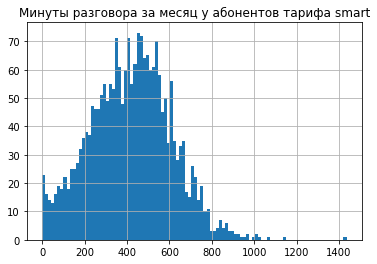

In [46]:
data_smart['mins_per_month'].hist(bins=100) # построение гистограммы  для минут разговора за месяц у пользователей тарифа smart
plt.title('Минуты разговора за месяц у абонентов тарифа smart')

Text(0.5, 1.0, 'Минуты разговора за месяц у абонентов тарифа ultra')

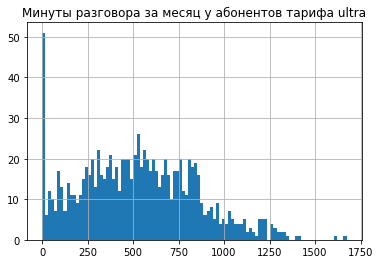

In [47]:
data_ultra['mins_per_month'].hist(bins=100) # построение гистограммы  для минут разговора за месяц у пользователей тарифа ultra
plt.title('Минуты разговора за месяц у абонентов тарифа ultra')

**Вывод**

Средний пользователь тарифа smart говорит по телефону в среднем 418 минут минут в месяц, с дисперсией в 36281  и стандартным отклонением в 190 минут.
Средний пользователь тарифа ultra говорит по телефону в среднем 526 минут минут в месяц, с дисперсией в 101052 и стандартным отклонением в 318 минут.
Пользователи тарифа ultra в среднем тратят на 108 минут разговоров больше, чем пользователи тарифа smart. Продолжительность звонков у пользователей тарифа ultra распределена более равномерно по сравнению с пользователями тарифа smart. Изменчивость продолжительности звонков также выше у пользователей тарифа ultra в более чем полтора раза.

На гистограмме потраченных минут разговора у пользователей тарифа smart видно, что значительное количество абонентов выходит за лимит в 500 минут. В то же время, среди пользователей ultra, судя по соответствующей гистограмме, тех, выходит за лимит 3000 минут, нет. Оба распределения скошены вправо, что означет, что медианная общая продолжительность минут разговора меньше средней, а значит, что в выборке много тех, кто мало разговаривает по телефону, но при этом есть и люди, которые очень много говорят по телефону.

### Типичное количество и распределение отправленных сообщений

In [48]:
messages_per_month_smart_mean = data_smart['messages_per_month'].mean() # среднее арифметическое количества отправленных сообщений для абонентов тарифа smart
messages_per_month_ultra_mean = data_ultra['messages_per_month'].mean() # среднее арифметическое количества отправленных сообщений для абонентов тарифа ultra
print('Cреднее количество отправленных сообщений в месяц у пользователей тарифа smart:', messages_per_month_smart_mean)
print('Cреднее количество отправленных сообщений в месяц у пользователей тарифа ultra:', messages_per_month_ultra_mean)

Cреднее количество отправленных сообщений в месяц у пользователей тарифа smart: 33.36905829596412
Cреднее количество отправленных сообщений в месяц у пользователей тарифа ultra: 49.31338742393509


In [49]:
messages_per_month_smart_variance = np.var(data_smart['messages_per_month'], ddof=1) # дисперсия количества отправленных сообщений для абонентов тарифа smart
messages_per_month_ultra_variance = np.var(data_ultra['messages_per_month'], ddof=1) # дисперсия количества отправленных сообщений для абонентов тарифа ultra
print('Дисперсия количества отправленных сообщений в месяц у пользователей тарифа smart: ', messages_per_month_smart_variance)
print('Дисперсия количества отправленных сообщений в месяц у пользователей тарифа ultra: ', messages_per_month_ultra_variance)

Дисперсия количества отправленных сообщений в месяц у пользователей тарифа smart:  796.9552557301104
Дисперсия количества отправленных сообщений в месяц у пользователей тарифа ultra:  2285.417424655839


In [50]:
messages_per_month_smart_stand_dev = np.std(data_smart['messages_per_month'], ddof=1) # стандартное отклонение количества отправленных сообщений для абонентов тарифа smart
messages_per_month_ultra_stand_dev = np.std(data_ultra['messages_per_month'], ddof=1) # стандартное отклонение количества отправленных сообщений для абонентов тарифа ultra
print('Стандартное отклонение количества отправленных сообщений в месяц у пользователей тарифа smart: ', messages_per_month_smart_stand_dev)
print('Стандартное отклонение количества отправленных сообщений в месяц у пользователей тарифа ultra: ', messages_per_month_ultra_stand_dev)

Стандартное отклонение количества отправленных сообщений в месяц у пользователей тарифа smart:  28.230395954185806
Стандартное отклонение количества отправленных сообщений в месяц у пользователей тарифа ultra:  47.80603962530089


Text(0.5, 1.0, 'Количество отправленных сообщений за месяц у абонентов тарифа smart')

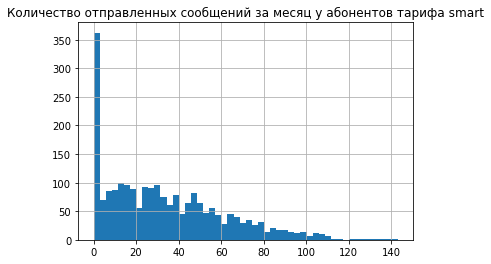

In [51]:
data_smart['messages_per_month'].hist(bins=50) # построение гистограммы отправленных сообщений за месяц у абонентов тарифа smart
plt.title('Количество отправленных сообщений за месяц у абонентов тарифа smart')

Text(0.5, 1.0, 'Количество отправленных сообщений за месяц у абонентов тарифа ultra')

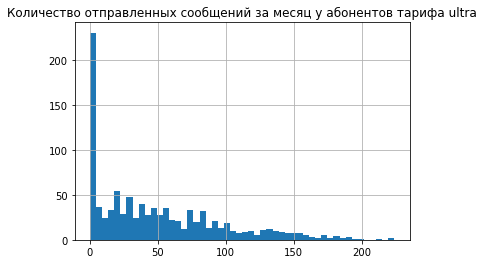

In [52]:
data_ultra['messages_per_month'].hist(bins=50) # построение гистограммы отправленных сообщений за месяц у абонентов тарифа ultra
plt.title('Количество отправленных сообщений за месяц у абонентов тарифа ultra')

**Вывод**

В среднем пользователи тарифа smart отправляют 33 сообщения за месяц с диспресией 797 и стандартным отклонением 28 сообщений в месяц.
В среднем пользователи тарифа ultra отправляют 49 сообщений за месяц с диспресией 2285 и стандартным отклонением 48 сообщений в месяц.
Таким образом, пользователи тарифа smart пользуются сообщениями реже, чем пользователи тарифа ultra.

Из гистограмм видно, что пользователей тарифа smart, отправивших больше 50 сообщений (вышедших за лимит тарифа) довольно много. В то время как пользователей тарифа ultra, вышедших за лимит в 1000 сообщений, нет. Cледовательно, среди пользователей smart много тех, кто переплачивает за сообщения по сравнению с пользователями тарифа ultra. Также среди пользователей smart примерно в полтора раза больше тех, кто вообще не пользуется сообщениями по сравнению с пользователями тарифа ultra. Оба распределения скошены вправо, что говорит о том, что медианное количество сообщений, отправленных пользователями, меньше среднего, значит в выборке присутствует много тех, кто отправляет мало сообщений, но также присутствуют и те, кто отпраляет аномально много сообщений.

### Типичное количество и распределение израсходованного интернет-трафика

In [53]:
gb_per_month_smart_mean = data_smart['gb_per_month'].mean() # среднее арифметическое количества потраченных гигабайтов для абонентов тарифа smart
gb_per_month_ultra_mean = data_ultra['gb_per_month'].mean() # среднее арифметическое количества потраченных гигабайтов для абонентов тарифа ultra
print('Cреднее количество потраченных гигабайтов в месяц у пользователей тарифа smart:', gb_per_month_smart_mean)
print('Cреднее количество потраченных гигабайтов в месяц у пользователей тарифа ultra:', gb_per_month_ultra_mean)

Cреднее количество потраченных гигабайтов в месяц у пользователей тарифа smart: 16.32152466367713
Cреднее количество потраченных гигабайтов в месяц у пользователей тарифа ultra: 19.474645030425965


In [54]:
gb_per_month_smart_variance = np.var(data_smart['gb_per_month'], ddof=1) # дисперсия количества потраченных гигабайтов для абонентов тарифа smart
gb_per_month_ultra_variance = np.var(data_ultra['gb_per_month'], ddof=1) # дисперсия количества потраченных гигабайтов для абонентов тарифа ultra
print('Дисперсия количества потраченных гигабайтов в месяц у пользователей тарифа smart: ', gb_per_month_smart_variance)
print('Дисперсия количества потраченных гигабайтов в месяц у пользователей тарифа ultra: ', gb_per_month_ultra_variance)

Дисперсия количества потраченных гигабайтов в месяц у пользователей тарифа smart:  33.13345303550617
Дисперсия количества потраченных гигабайтов в месяц у пользователей тарифа ultra:  97.3785442901125


In [55]:
gb_per_month_smart_stand_dev = np.std(data_smart['gb_per_month'], ddof=1) # стандартное отклонение количества потраченных гигабайтов для абонентов тарифа smart
gb_per_month_ultra_stand_dev = np.std(data_ultra['gb_per_month'], ddof=1) # стандартное отклонение количества потраченных гигабайтов для абонентов тарифа ultra
print('Стандартное отклонение количества потраченных гигабайтов в месяц у пользователей тарифа smart: ', gb_per_month_smart_stand_dev)
print('Стандартное отклонение количества потраченных гигабайтов в месяц у пользователей тарифа ultra: ', gb_per_month_ultra_stand_dev)

Стандартное отклонение количества потраченных гигабайтов в месяц у пользователей тарифа smart:  5.756166522565706
Стандартное отклонение количества потраченных гигабайтов в месяц у пользователей тарифа ultra:  9.868056763624361


Text(0.5, 0, 'Количество потраченных гигабайтов за месяц у абонентов тарифа smart')

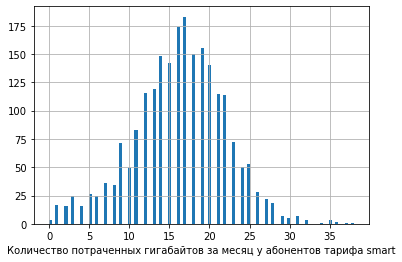

In [56]:
data_smart['gb_per_month'].hist(bins=100) # построение гистограммы потраченных гигабайтов за месяц у абонентов тарифа smart
plt.xlabel('Количество потраченных гигабайтов за месяц у абонентов тарифа smart')

Text(0.5, 0, 'Количество потраченных гигабайтов за месяц у абонентов тарифа ultra')

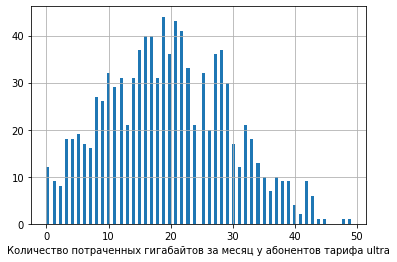

In [57]:
data_ultra['gb_per_month'].hist(bins=100) # построение гистограммы потраченных гигабайтов за месяц у абонентов тарифа ultra
plt.xlabel('Количество потраченных гигабайтов за месяц у абонентов тарифа ultra')

**Вывод**

В среднем пользователь тарифа smart расходует 16 гигабайт интернет-трафика с дисперсий равной 33 и стандартным отклонением 6 гигабайт.
В среднем пользователь тарифа ultra расходует 19 гигабайт интернет-трафика с дисперсий равной 97 и стандартным отклонением 10 гигабайт.
Таким образом, пользователи тарифа ultra расходуют больше интернета, чем пользователи тарифа smart.

На основании гистограмм можно сказать, что распределение для тарифа smart по форме симметричное и напоминает нормальное; распределение для тарифа ultra скошено вправо (очень много тех, кто не использует все 30 гигабайт). По гистограмме пользователей тарифа smart видно, что больше половины пользователей расходуют больше отведенных 15 гигабайтов интернет-трафика, соотвественно, среди пользователей этого тарифа больше тех, кто переплачивает за интернет-трафик. Среди пользователей тарифа ultra тех, кто использует больше отведенных 30 гигабайтов интернет-трафика довольно мало, поэтому пользователи тарифа ultra редко переплачивают на интернет.

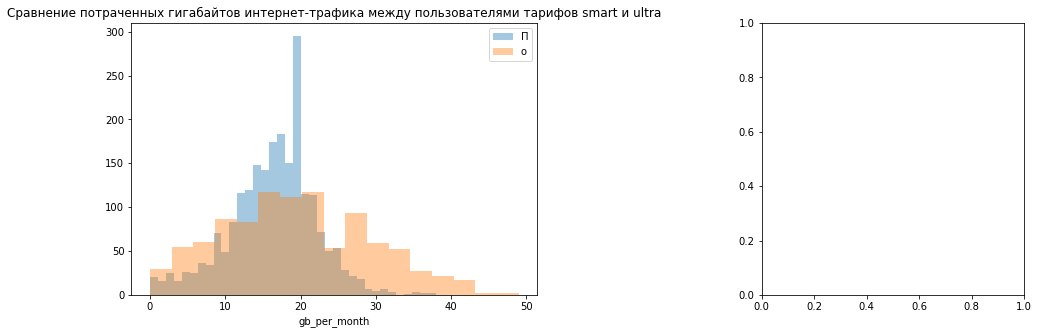

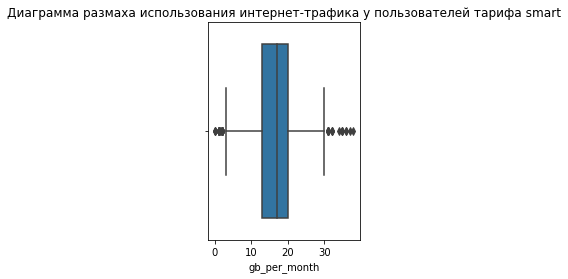

Text(0.5, 1.0, 'Диаграмма размаха использования интернет-трафика у пользователей тарифа ultra')

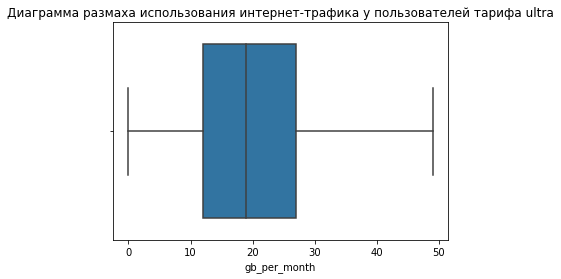

In [58]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.distplot(data_smart['gb_per_month'], kde=False) # диаграмма для пользователей smart (она синяя)
plt.legend('Пользователи тарифа smart', loc = 'upper right') # помоги, пожалуйста, сделать так, чтобы вся легенда была видна, а не ее кусочек
plt.subplot(1, 2, 1)
sns.distplot(data_ultra['gb_per_month'], kde=False) # диаграмма для пользователей ultra (она оранжевая)
plt.legend('Пользователи тарифа ultra', loc = 'upper right')

plt.title('Сравнение потраченных гигабайтов интернет-трафика между пользователями тарифов smart и ultra')
plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(data_smart['gb_per_month'])
plt.title('Диаграмма размаха использования интернет-трафика у пользователей тарифа smart')
plt.show()
sns.boxplot(data_ultra['gb_per_month'])
plt.title('Диаграмма размаха использования интернет-трафика у пользователей тарифа ultra')

## Проверка гипотез

### Проверка гипотезы о различии средних выручек между пользователями тарифов smart и ultra

Необходимо проверить гипотезу о том, что средняя выручка, полученная с пользователей тарифа smart отличается от средней выручки, полученной от пользователей тарифа ultra. Для этого будет использован двусторонний t-тест, так как необходимо выяснить, есть ли различия в любую сторону.

Нулевая гипотеза: средняя выручка от пользователей тарифа smart равна средней выручке от пользователей тарифа ultra.

Альтернативная гипотеза: средние выручки от пользователей тарифа smart и от пользователей тарифа ultra различаются.

In [59]:
alpha = 0.05 # критический уровень статистической значимости
result_1 = st.ttest_ind(data_smart['revenue_per_month'], data_ultra['revenue_per_month'], equal_var=False) # расчет t-значения для выборок
print('p-значение: ', result_1.pvalue) # расчет p-значения для t-значения
if result_1.pvalue < alpha: # сравнение p-значения с критическим уровнем статистической значимости
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

p-значение:  1.927011394420941e-250
Нулевая гипотеза отвергается


Теперь необходимо выяснить, пользователи какого тарифа приносят большую выручку. Для этого будет использован односторонний t-тест, так как он позволяет определить, в какую именно сторону направлены различия.

Нулевая гипотеза: средняя выручка от пользователей тарифа smart меньше выручки от пользователей тарифа ultra.

Альтернативная гипотеза: средняя выручка от пользователей тарифа smart больше средней выручки от пользователей тарифа ultra.


Прежде всего необходимо проверить, равны ли дисперсии выборок. Так как среди выборок нет большого количества экстремальных значений, то для этой цели подойдет тест Бартлетта.

In [60]:
stat, p = st.bartlett(data_ultra['revenue_per_month'], data_smart['revenue_per_month']) # тест Бартлетта для определения равенства дисперсий выборок
print("р-значение: ", p)

р-значение:  1.0829918779018596e-141


Так как p-значение теста Бартлетта очень близко к нулю, то выборки имеют разную дисперсию.

In [61]:
interested_value = data_ultra['revenue_per_month'].mean() # средняя вырука от пользователей тарифа ultra

alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_1samp(data_smart['revenue_per_month'], interested_value) # односторонний t-тест для выборки пользоваателей тарифа smart

print('p-значение:', results.pvalue /2) # p-значение для одностороннего теста

if (results.pvalue/2 < alpha) and (data_smart['revenue_per_month'].mean() > interested_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.75462383e-316
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Выручки пользователей тарифов smart и ultra различаются. По результатам проверки односторенней гипотезы, нулевая гипотеза не отвергается (средняя выручка от пользователей тарифа smart меньше средней выручки от пользователей тарифа ultra).

### Проверка гипотезы о различии средних выручек между пользователями из Москвы и из других регионов

Для проверки этой гипотезы будет использован двухсторонний t-тест, так как необходимо проверить, есть ли различия в любую сторону.

Нулевая гипотеза: средняя выручка от пользователей из Москвы равна средней выручке от пользователей из других регионов.

Альтернативная гипотеза: средние выручки от пользователей из Москвы и от пользователей из других регионов различаются.

In [62]:
data_city = data_users[['user_id', 'city']] # срез, в котором содержится информация о городах пользователей
data_city.head()

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк


In [63]:
data = data.merge(data_city, on = 'user_id', how='outer') # добавление в основной датафрейм информации о городе пользователей
data.head(10)

,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff,revenue_per_month,city
0,1000,5.0,159,22,3,22,ultra,1950,Краснодар
1,1000,6.0,172,43,23,60,ultra,1950,Краснодар
2,1000,7.0,340,47,14,75,ultra,1950,Краснодар
3,1000,8.0,408,52,14,81,ultra,1950,Краснодар
4,1000,9.0,466,58,15,57,ultra,1950,Краснодар
5,1000,10.0,350,57,15,73,ultra,1950,Краснодар
6,1000,11.0,338,43,15,58,ultra,1950,Краснодар
7,1000,12.0,333,46,10,70,ultra,1950,Краснодар
8,1001,11.0,430,59,18,0,smart,1150,Москва
9,1001,12.0,414,63,14,0,smart,550,Москва


In [64]:
data_moscow = data.query('city == "Москва"') # срез, в котором находятся только пользователи из Москвы
data_moscow.head(10)

,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff,revenue_per_month,city
8,1001,11.0,430,59,18,0,smart,1150,Москва
9,1001,12.0,414,63,14,0,smart,550,Москва
17,1003,8.0,380,55,9,37,ultra,1950,Москва
18,1003,9.0,961,134,13,91,ultra,1950,Москва
19,1003,10.0,855,108,15,83,ultra,1950,Москва
20,1003,11.0,824,115,12,94,ultra,1950,Москва
21,1003,12.0,802,108,10,75,ultra,1950,Москва
53,1007,4.0,198,25,8,11,smart,550,Москва
54,1007,5.0,480,67,18,39,smart,1150,Москва
55,1007,6.0,545,68,14,26,smart,685,Москва


In [65]:
data_other_region = data.query('city != "Москва"') # срез, в котором находятся только пользователи из всех регионов кроме Москвы
data_other_region.head(10)

,user_id,month,mins_per_month,calls_per_month,gb_per_month,messages_per_month,tariff,revenue_per_month,city
0,1000,5.0,159,22,3,22,ultra,1950,Краснодар
1,1000,6.0,172,43,23,60,ultra,1950,Краснодар
2,1000,7.0,340,47,14,75,ultra,1950,Краснодар
3,1000,8.0,408,52,14,81,ultra,1950,Краснодар
4,1000,9.0,466,58,15,57,ultra,1950,Краснодар
5,1000,10.0,350,57,15,73,ultra,1950,Краснодар
6,1000,11.0,338,43,15,58,ultra,1950,Краснодар
7,1000,12.0,333,46,10,70,ultra,1950,Краснодар
10,1002,6.0,117,15,11,4,smart,550,Стерлитамак
11,1002,7.0,214,26,18,11,smart,1150,Стерлитамак


In [66]:
alpha = 0.05 # критический уровень статистической значимости
result_2 = st.ttest_ind(data_moscow['revenue_per_month'], data_other_region['revenue_per_month'], equal_var=False) # нахождения t-значения для проверки гипотезы
print('p-значение:', result_2.pvalue) # расчет p-значения для t-значения
if result_2.pvalue < alpha: # сравнение p-значения с критическим уровнем статистической значимости
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')


p-значение: 0.5216952110000279
Нулевая гипотеза не отвергается


**Вывод**

Для гипотезы  о различии средних выручек между пользователями из Москвы и из других регионов p-значение больше критического уровня значимости, следовательно, нулевая гипотеза не отвергается (средняя выручка от пользователей из Москвы равна выручке от пользователей из других регионов)

## Общий вывод

Пользователи тарифа smart совершают в среднем за разговаривает 418 ± 190 минут в месяц, отправляют 33 ± 28 сообщений в месяц и расходуют 16 ± 6 гигабайт интернет-трафика при лимите в 500 минут разговора, 50 смс и 15 гигабайт интернет-трафика в месяц.

Пользователи тарифа ultra совершают в среднем за разговаривает 526 ± 318 минут в месяц, отправляют 49 ± 48 сообщений в месяц и расходуют 19 ± 10 гигабайт интернет-трафика при лимите в 3000 минут разговора, 1000 сообщений и 30 гигабайт интернет-трафика в месяц.

Пользователи тарифа smart намного чаще выходят за отведенный лимит по продолжительности звонков, количеству отправленных сообщений и количеству потраченных гигабайтов интернета по сравнению с пользователями тарифа ultra. Соответственно, пользователи тарифа smart чаще и больше переплачивают чем те, кто пользуется тарифом ultra.

Среди пользователей тарифа ultra фактически нет тех, кто выходил бы за рамки тарифа. Наоборот, пользователи тарифа ultra используют далеко не весь пакет за месяц, соотвественно, все эти пользователи регулярно переплачивают.

Различий по выручке с абонента в зависимости от региона его проживания (Москва или иной регион) не было обнаружено.

Следовательно, компании выгоднее продавать тариф ultra, чем тариф smart вне зависимости от региона, где проживает абонент.